In [513]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from mpl_toolkits import mplot3d
from math import *
import sympy as sp
sp.init_printing(use_unicode=True)

# Question 1

# (a)

In [514]:
#uij = mean of i-th class and j-th dimension
u11 = 0.5
u12 = 0.8
u21 = 0.9
u22 = 0.2

In [515]:
rv11 = bernoulli.rvs(u11,size = 100)
rv12 = bernoulli.rvs(u12,size = 100)
rv21 = bernoulli.rvs(u21,size = 100)
rv22 = bernoulli.rvs(u22,size = 100)

In [516]:
data1 = {}
data2 = {}

c1 = [1]*100
c2 = [2]*100

data1['f1'] = list(rv11)
data1['f2'] = list(rv12)
data1['class'] = c1
data2['f1'] = list(rv21)
data2['f2'] = list(rv22)
data2['class']= c2

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [517]:
print('Data generation')
print(df1)
print(df2)

Data generation
    f1  f2  class
0    1   1      1
1    0   0      1
2    1   1      1
3    1   1      1
4    0   1      1
..  ..  ..    ...
95   1   0      1
96   1   1      1
97   1   1      1
98   0   1      1
99   1   1      1

[100 rows x 3 columns]
    f1  f2  class
0    1   0      2
1    1   1      2
2    1   0      2
3    1   1      2
4    1   0      2
..  ..  ..    ...
95   1   0      2
96   1   0      2
97   1   0      2
98   1   0      2
99   1   0      2

[100 rows x 3 columns]


In [518]:
def computeMLE(xi, n):
  return sum(xi[:n])/n

In [519]:
def plotN_MLE(l,s):

  x = []
  y = []

  for i in range(1,51):
    x.append(i)
    y.append(computeMLE(l,i))

  plt.plot(x, y)
  plt.xlabel("n")  
  plt.ylabel("MLE")  
  plt.title(s)  
  plt.show()

# (b)

In [520]:
# split a dataset into train and test sets
features1 = df1.loc[ : , df1.columns != 'class']
labels1 = pd.DataFrame(df1['class'])

# split into train test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, labels1, test_size=0.50, random_state = 0)

In [521]:
u11_mle = computeMLE(X_train1['f1'].tolist(),50)
u12_mle = computeMLE(X_train1['f2'].tolist(),50)
u1_mle = np.array([u11_mle,u12_mle])
print('The MLE for class 1 is')
print(u1_mle)

The MLE for class 1 is
[0.58 0.84]


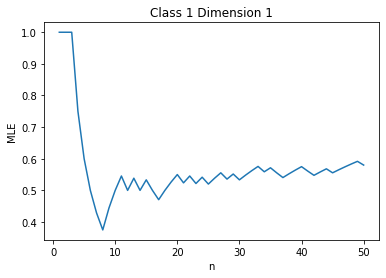

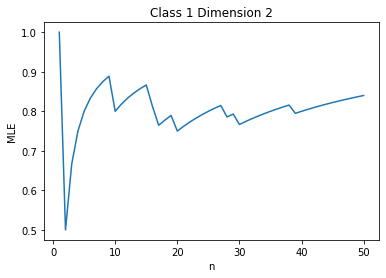

In [522]:
plotN_MLE(X_train1['f1'].tolist(),'Class 1 Dimension 1')
plotN_MLE(X_train1['f2'].tolist(),'Class 1 Dimension 2')

# (c)

In [523]:
# split a dataset into train and test sets
features2 = df2.loc[ : , df2.columns != 'class']
labels2 = pd.DataFrame(df2['class'])

# split into train test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size=0.50, random_state = 0)

In [524]:
u21_mle = computeMLE(X_train2['f1'].tolist(),50)
u22_mle = computeMLE(X_train2['f2'].tolist(),50)
u2_mle = np.array([u21_mle,u22_mle])
print('The MLE for class 2 is')
print(u2_mle)

The MLE for class 2 is
[0.94 0.2 ]


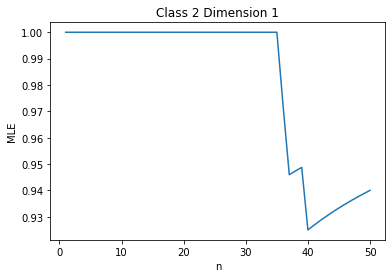

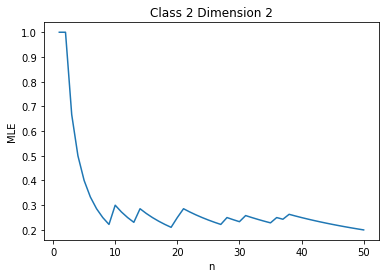

In [525]:
plotN_MLE(X_train2['f1'].tolist(),'Class 2 Dimension 1')
plotN_MLE(X_train2['f2'].tolist(),'Class 2 Dimension 2')

# (d)

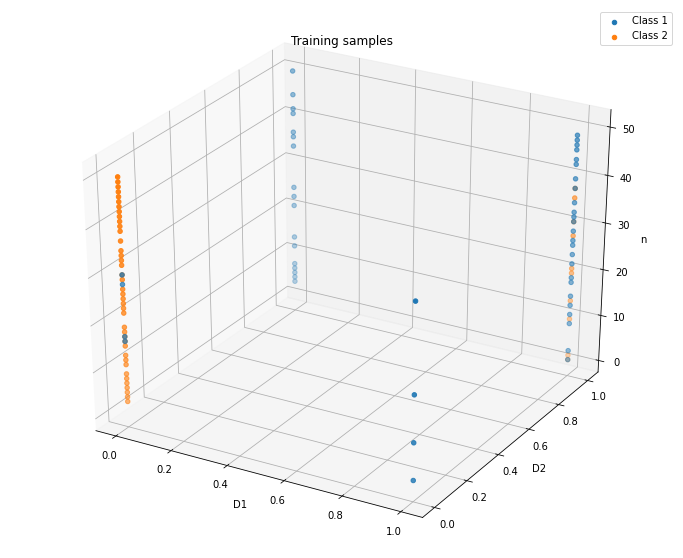

In [526]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')

z = []
for i in range(0,50):
  z.append(i+1)

x = X_train1['f1'].tolist()
y = X_train1['f2'].tolist()

# plotting
ax.scatter3D(x, y, z, label='Class 1')

x = X_train2['f2'].tolist()
y = X_train2['f2'].tolist()

ax.scatter3D(x, y, z, label='Class 2')

ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('n')
ax.set_title('Training samples')
plt.legend()
plt.show()


# (e)

In [527]:
def discriminant(mu11, mu12, mu21, mu22, x1, x2):
  d1 = np.log(pow(u11_mle, x1)*pow(1-u11_mle, 1-x1)*pow(u12_mle, x2)*pow(1-u12_mle, 1-x2))
  d2 = np.log(pow(u21_mle, x1)*pow(1-u21_mle, 1-x1)*pow(u22_mle, x2)*pow(1-u22_mle, 1-x2))
  if d1>=d2:
    return 1
  else:
    return 2

In [528]:
X_test1_f1 = X_test1['f1'].tolist()
X_test1_f2 = X_test1['f2'].tolist()
pred1 = []
for i in range(50):
  d = discriminant(u11, u12, u21, u22, X_test1_f1[i], X_test1_f2[i])
  pred1.append(d)

In [529]:
X_test2_f1 = X_test2['f1'].tolist()
X_test2_f2 = X_test2['f2'].tolist()
pred2 = []
for i in range(50):
  d = discriminant(u11, u12, u21, u22, X_test2_f1[i], X_test2_f2[i])
  pred2.append(d)

In [530]:
num1 = 0
num2 = 0

for i in range(50):
  if pred1[i]==1:
    num1 += 1
  if pred2[i]==2:
    num2 += 1

print('Accuracy for class 1')
print(num1/50)
print('Accuracy for class 2')
print(num2/50)

Accuracy for class 1
0.92
Accuracy for class 2
0.78


# Question 3

# (c)

In [531]:
X = np.array([[2,4],[6,8]])
mu = np.array([[3],[7]])

print('X')
print(X)

print()

print('Mean')
print(mu)

X
[[2 4]
 [6 8]]

Mean
[[3]
 [7]]


In [532]:
Xc = np.array([[-1,1],[-1,1]])
print('Centralised X')
print(Xc)

Centralised X
[[-1  1]
 [-1  1]]


In [533]:
S = 0.5*(np.dot(Xc,np.transpose(Xc)))
print('The covariance')
print(S)

The covariance
[[1. 1.]
 [1. 1.]]


In [534]:
e1, e2 = np.linalg.eig(S)

print('Eigenvalue 1')
print(e1[0])
print('Eigenvalue 2')
print(e1[1])

print()
print('The eigenvectors are')

print('       1           2')
print(e2)

Eigenvalue 1
2.0
Eigenvalue 2
0.0

The eigenvectors are
       1           2
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [535]:
U = e2

In [536]:
print('U')
print(U)

U
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [537]:
U1 = U[:,:1]

In [538]:
Y = np.dot(np.transpose(U1),Xc)
print('Y')
print(Y)

Y
[[-1.41421356  1.41421356]]


In [539]:
X_ = np.dot(U1,Y)
print(X_)
print()

X_[0][0] += 3
X_[0][1] += 3
X_[1][0] += 7
X_[1][1] += 7

print('After adding mean')
print(X_)

[[-1.  1.]
 [-1.  1.]]

After adding mean
[[2. 4.]
 [6. 8.]]


In [540]:
mse = 0
for i in range(2):
  for j in range(2):
    mse += pow(X_[i][j]-X[i][j],2)
mse /= 4
print('MSE = ',mse)

MSE =  0.0


In [541]:
Y = np.dot(np.transpose(U),Xc)
print('Y')
print(Y)

Y
[[-1.41421356  1.41421356]
 [ 0.          0.        ]]


In [542]:
X_ = np.dot(U,Y)
print(X_)
print()

X_[0][0] += 3
X_[0][1] += 3
X_[1][0] += 7
X_[1][1] += 7

print('After adding mean')
print(X_)

[[-1.  1.]
 [-1.  1.]]

After adding mean
[[2. 4.]
 [6. 8.]]


In [543]:
mse = 0
for i in range(2):
  for j in range(2):
    mse += pow(X_[i][j]-X[i][j],2)
mse /= 4
print('MSE = ',mse)

MSE =  0.0


# (d)

In [544]:
d = 3
N = 100
mu = np.array([66, 60, 60])
sigma = np.array([[630, 450, 225], [450, 450, 0], [225, 0, 900]])
X = np.random.multivariate_normal(mu, sigma, N)
X = X.T
X

array([[ 48.90712774,  85.79816322,  93.2186929 ,  53.03665953,
         89.16298053,  60.92977135,  42.52753241, 109.41581537,
         68.6125849 ,  82.59314984,  40.66245018, 107.08953609,
         88.02357432,  56.27859456,  42.81827991,  99.94538191,
         30.95982081,  76.77038999,  90.02790368,  75.97751919,
        109.99788738,  72.27889426,  18.85409565,  49.37993674,
         66.68521948,  56.66411163,  30.62339496,  99.95554969,
         52.25824049,  86.09235611,  17.71519545,  40.72714836,
         65.20705818,  40.62892098,  34.15613411, 114.18016183,
         71.69760465,  82.21331978,  66.37174964,  49.36747866,
         50.12598781,  34.24528784,  62.73151658,  75.5605683 ,
         88.5417474 ,  35.38717748,  72.74018226,  62.1575395 ,
         32.69217062,   8.93312759, 100.61151548,  53.00952438,
        105.04979113,  47.5200054 ,  55.74797169, 106.41344908,
         82.85435209,  39.91896299, 112.67550217,  32.75330527,
         76.92861262,  22.94648209,  92.

# (e)

In [545]:
Xc = np.empty((d,N))
for i in range(d):
  for j in range(N):
    Xc[i][j] = X[i][j]-mu[i]

print('Xc = ', Xc)

S = np.cov(Xc)
print('S = ', S)

eigenValues, eigenVectors = np.linalg.eig(S)

idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

print('Eigenvalues = ',eigenValues)
print('U = ', eigenVectors)

Xc =  [[-1.70928723e+01  1.97981632e+01  2.72186929e+01 -1.29633405e+01
   2.31629805e+01 -5.07022865e+00 -2.34724676e+01  4.34158154e+01
   2.61258490e+00  1.65931498e+01 -2.53375498e+01  4.10895361e+01
   2.20235743e+01 -9.72140544e+00 -2.31817201e+01  3.39453819e+01
  -3.50401792e+01  1.07703900e+01  2.40279037e+01  9.97751919e+00
   4.39978874e+01  6.27889426e+00 -4.71459044e+01 -1.66200633e+01
   6.85219477e-01 -9.33588837e+00 -3.53766050e+01  3.39555497e+01
  -1.37417595e+01  2.00923561e+01 -4.82848046e+01 -2.52728516e+01
  -7.92941823e-01 -2.53710790e+01 -3.18438659e+01  4.81801618e+01
   5.69760465e+00  1.62133198e+01  3.71749637e-01 -1.66325213e+01
  -1.58740122e+01 -3.17547122e+01 -3.26848342e+00  9.56056830e+00
   2.25417474e+01 -3.06128225e+01  6.74018226e+00 -3.84246050e+00
  -3.33078294e+01 -5.70668724e+01  3.46115155e+01 -1.29904756e+01
   3.90497911e+01 -1.84799946e+01 -1.02520283e+01  4.04134491e+01
   1.68543521e+01 -2.60810370e+01  4.66755022e+01 -3.32466947e+01
   1

# (f)

In [546]:
def computeMSE(X1, X2, ro, col):
  mse = np.square(np.subtract(X1, X2))
  mse = np.mean(mse)
  return mse

In [547]:
def computeY(U,xc,p):
  U = U[:,:p]
  # print('UUUU = ', U)
  Y = np.dot(np.transpose(U),xc)
  return Y

In [548]:
def computeFinalX(u,y,mean,p,d,N):
  u = u[:,:p]
  x = np.dot(u,y)
  # print(x)
  for i in range(d):
    for j in range(N):
      x[i][j] += mean[i]
  return x

In [549]:
Y = computeY(eigenVectors,Xc,d)
print(Y)
X_ = computeFinalX(eigenVectors,Y,mu,d,d,N)
print(X_)
mse = computeMSE(X_,X,d,N)
print(mse)

[[-1.02239331e+01  3.96971823e+01  3.23116911e+01 -1.28679429e+01
   1.99854732e+01  2.41046202e+01 -2.95019625e+01  3.73472573e+01
   2.38839064e+01 -2.39124519e+01  3.28951105e+00  4.55480409e+01
   2.80543021e+01 -4.85066066e+01 -4.53157571e+01  1.70480617e+01
  -2.67053156e+01  3.54239826e+01  2.22346453e+01  3.26053611e+01
   4.40120293e+01  2.28697540e+01 -3.17487214e+01 -4.86495483e+01
   1.38328439e+01  5.29875897e+00 -2.63095589e+01 -5.27034443e+00
   1.33622377e+01  5.49447685e+01 -3.15067655e+01 -5.68632796e+01
   7.13285564e+00 -2.63805138e+01 -3.07122809e+01  2.82306615e+01
   5.35120072e+00  4.93231881e+01 -2.29663480e+01 -3.39414724e+01
  -2.59639935e+01 -6.31760990e+01  2.00455432e+00  3.04840836e+01
   2.84246603e+01 -3.93395274e+01  1.07411655e+01 -1.37825851e-01
  -4.14905961e+01 -8.53703768e+01  5.44526115e+00 -5.88989397e+01
   9.03607646e+00 -9.98663729e+00 -8.96169474e+00 -6.06300336e+00
  -4.32682019e+00 -5.34863872e+01  2.36357300e+01 -2.12583043e+01
   2.65828

# (g)

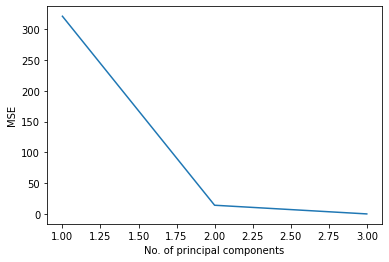

In [550]:
x_axis = []
y_axis = []

for i in range(min(d,N)):
  x_axis.append(i+1)
  Y = computeY(eigenVectors,Xc,i+1)
  X_ = computeFinalX(eigenVectors,Y,mu,i+1,d,N)
  mse = computeMSE(X_,X,i+1,N)
  y_axis.append(mse)

plt.plot(x_axis, y_axis)
plt.xlabel('No. of principal components')
plt.ylabel('MSE')
plt.show()